# Résolution numérique de l'équation de Burgers

Soit T > 0. On considère le problème suivant :
$$
    \tag{$\ast$}
    \begin{cases}
        \partial_t u + \partial_x ( f(u) ) = 0 & \; \forall x \in ] -1, 4 [, \forall t \in ] 0, T [, \\
        u(-1,t) = 1                            & \; \forall t \in ] 0, T [ , \\
        u(x,0) = u_0(x)                        & \; \forall x \in ] -1, 4 [.
    \end{cases}
$$

Cette équation peut par exemple modéliser la vitesse $u$ d'un fluide, en fonction de l'espace $x$ et du temps $t$, quand ce fluide se déplace dans un tuyau sans friction.
Pour modéliser ce phénomène physique, on choisit la fonction réelle $f$, représentant le flux de fluide à travers le tuyau, de la façon suivante :
$
    f(u) = \frac {u^2} 2.
$
On appelle alors $(\ast)$ l'**équation de Burgers** sans viscosité.

C'est une EDP hyperbolique non linéaire : en temps fini, une solution (faible) peut développer des discontinuités, même en partant de données initiales régulières.

On considérera la condition initiale suivante :
$
    u_0(x) =
    \begin{cases}
        1 \vphantom{\dfrac 1 2}    & \; \text{si } x < 0, \\
        1 - \dfrac x 2             & \; \text{si } 0 \leq x \leq 2, \\
        0 \vphantom{\dfrac 1 2}    & \; \text{si } 2 < x.
    \end{cases}
$

**Question 1.1.** Montrer que la solution (éventuellement discontinue mais admissible au sens de Lax) du problème $(\ast)$ est :
$
    u(x,t) = 
    \begin{cases}
        1 & \text{si } x < t & \text{ et } t < 2, \\
        \frac{2-x}{2-t} & \text{si } t \leq x \leq 2 & \text{ et } t < 2, \\
        1 & \text{si } x < \frac{t+2}2 & \text{ et } t \geq 2, \\
        0 & \text{si } x \geq \frac{t+2}2 & \text{ et } t \geq 2.
    \end{cases}
$

**Réponse 1.1.**

**Si t < 2**

Si $t \leq x \leq 2$
alors $$ x-t \ge 0 \Longrightarrow \dfrac{x-t}{2-t} \ge 0 \Longrightarrow x_0 \ge 0$$
Donc si $0 \leq x_0 \leq 2$ 

On sait d'après le cours que $ x = f'(u_0(x_0))t + x_0 $ avec $f(u) = \dfrac{u^2}{2}$
Ainsi $$ x = u_0(x_0)t + x_0 \Longleftrightarrow x = (1- \dfrac{x_0}{2})t + x_0 \Longleftrightarrow x- t  = x_0(2-t) \Longleftrightarrow x_0 = \dfrac{x-t}{2-t}$$

Or par la méthode des caractéristique on sait que les deux points $(x_0,0)$ et $(x,t)$ sont sur la même courbe caractéristique. Ainsi $$u(x_0,0)= u(x,t) = 1 - \dfrac{x_0}{2} = 1- \dfrac{(\dfrac{x-t}{2-t})}{2} = \dfrac{2-x}{2-t}$$

Si $x< t$ alors $$x-t<0 \Longrightarrow \dfrac{x-t}{2-t} < 0 \Longrightarrow x_0 < 0$$
Or par la méthode des caractéristique cela veut dire que $$u(x_0,0)= u(x,t) = 1$$

**Si t $\ge$ 2**

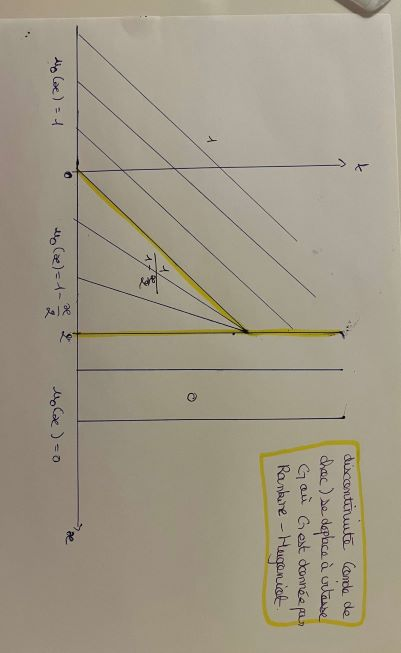

On sait que Rankino-Hugounot suit la discontinuité
On a $$(u_R - u_L)G = f(u_R) - f(u_L) = \dfrac{u_R^2}{2}-\dfrac{u_L^2}{2} = (u_R - u_L) \dfrac{(u_R + u_L)}{2} \Longrightarrow G = \dfrac{u_R + u_L}{2} = \dfrac{1 + 0}{2} =\dfrac{1}{2} $$

Le choc est donc une droite de pente $\dfrac{1}{2} $ qui passe par $(x,t) = (2,2)$
Donc $$ x-2 = \dfrac{1}{2} (t-2) \Longleftrightarrow x = \dfrac{t+2}{2}$$

Ainsi si $x<\dfrac{t+2}{2}$ c'est à dire avant le choc on a $u(x,t) = 1$ et  $x\ge \dfrac{t+2}{2}$ c'est à dire aprés le choc on a $u(x,t) = 0$




**Question 1.2.** Programmer le schéma aux différences finies suivant :
\begin{equation*}
    \frac { u_i^{n+1} - u_i^n } {\Delta t} + u_{i-1}^n \frac { u_i^n - u_{i-1}^n } {\Delta x} = 0.
\end{equation*}
Comparer la solution numérique et la solution exacte aux instants $t = 1$, $t = 2$ et $t = 3$, avec des discrétisations en espace à $N = 50$, $N = 100$ et $N = 1000$ points.
Discuter de l'approximation de la discontinuité, et conclure quant à l'applicabilité de cette discrétisation aux différences finies.

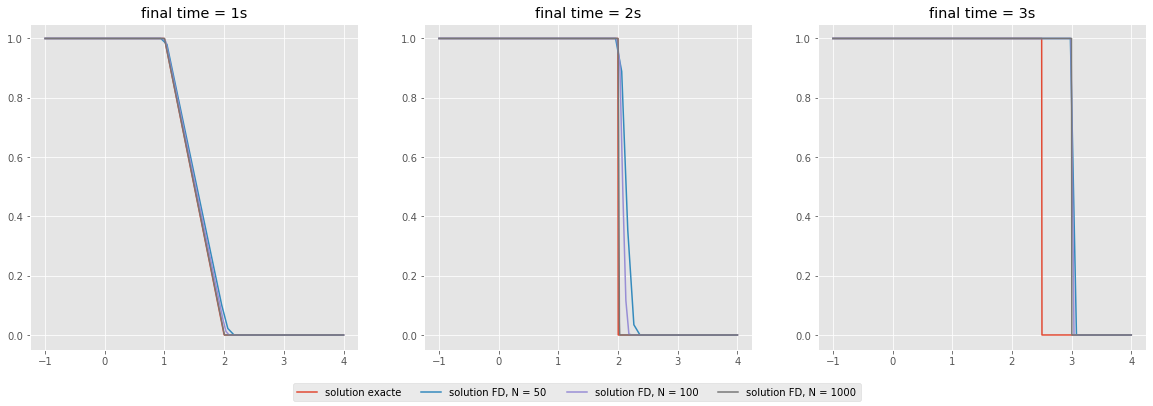

In [1]:
import numpy as np                  # librairie numpy
import matplotlib.pyplot as plt     # librairie matplotlib
plt.style.use('ggplot')             # optionnel : plus jolis graphes (c'est subjectif !)

def u_0(x):
    ## cette fonction retourne la condition initiale en fonction de x pour l'équation de Burgers
    return (1 - x/2) * np.logical_and( 0<= x, x <= 2) + 1 * (x < 0) 

def u_BC():
    ## cette fonction retourne la valeur de la condition aux limites à gauche pour l'équation de Burgers
    return 1

def u_exact(x, t):
    ## cette fonction retourne la solution exacte en fonction de x et t
    if t < 2:
        return ((2 - x)/(2 - t)) * np.logical_and(t <= x, x <= 2) + (1 * (x < t))
    else:
        return 1 * (x < (t + 2)/2)

def compute_dt_FD( u, dx, time, end_time ):
    ## cette fonction calcule le pas de temps pour le schéma aux différences finies
    dt = dx / np.max(u)
    ## on réduit le pas de temps si besoin, pour ne pas dépasser end_time
    if time + dt > end_time:
        dt = end_time - time
    return dt

def update_FD( u, dx, dt, N ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma aux différences finies
    u_FD = np.zeros(N)
    u_FD[0] = u[0] - (dt/dx)* u_BC() * (u[0] - u_BC())
    for i in range(1,N):
        u_FD[i] = u[i] - (dt/dx)*u[i-1]*(u[i] - u[i-1])
    return u_FD

xmin =  -1       # borne inférieure de l'intervalle
xmax =   4       # borne supérieure de l'intervalle

# pas besoin de modifier cette ligne
fig, ax = plt.subplots( 1, 3, figsize = ( 20, 6 ) )

all_times = [ 1, 2, 3 ]         # les temps finaux qu'on veut regarder
all_N = [ 50, 100, 1000 ]       # les discrétisations en espace qu'on veut regarder

for i_t, end_time in enumerate(all_times):
    # on parcourt tous les temps finaux
    
    # pas besoin de modifier les quatre lignes ci-dessous
    ax[i_t].set_title("final time = {0}s".format(end_time))
    exact_x = np.linspace(xmin, xmax, 1000)
    exact_solution = u_exact(np.linspace(xmin, xmax, 1000), end_time)
    ax[i_t].plot( exact_x, exact_solution, label="solution exacte" )  

    for i_N, N in enumerate(all_N):
        # on parcourt toutes les discrétisations en espace

        x = np.linspace(xmin, xmax, N)            # points de discrétisation
        dx =  (xmax - xmin)/N          # pas de discrétisation

        u =   u_0(x)          # condition initiale

        time =   0       # temps initial

        while time < end_time:
            ## boucle en temps : on part de u = u_0, et on fait évoluer la valeur de u en utilisant update_FD
            dt = compute_dt_FD( u, dx, time, end_time )
            u = update_FD( u, dx, dt, N )
            time = time + dt

        # pas besoin de changer les lignes ci-dessous
        ax[i_t].plot( x, u, label="solution FD, N = {0}".format(N) ) 

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend( handles, labels, loc='lower center', ncol=4 );

**Réponse 1.2.**  

**Question 1.3.** Montrer que le schéma de Rusanov pour une EDP de la forme $\partial_t u + \partial_x ( f(u) ) = 0$ s'écrit :
\begin{equation*}
    u_i^{n+1} = u_i^n - \frac{\Delta t}{\Delta x} \left( \mathcal{F}(u_i^n, u_{i+1}^n, \lambda) - \mathcal{F}(u_{i-1}^n, u_i^n, \lambda) \right),
\end{equation*}
où le flux numérique $\mathcal{F}(u_L,u_R,\lambda)$ est donné par
\begin{equation*}
    \mathcal{F}(u_L,u_R,\lambda) = \frac{f(u_L) + f(u_R)} 2 - \frac \lambda 2 ( u_R - u_L ),
\end{equation*}
avec 
\begin{equation*}
    \lambda = \max_i \left| \dfrac {\partial f}{\partial u} (u_i) \right|
    \quad \text{ et } \quad
    \Delta t = C \frac {\Delta x} {\lambda},
\end{equation*}
où $C$ est un nombre CFL, que l'on pourra prendre égal à $0.5$.
La condition aux limites à droite sera une condition de Neumann homogène.

**Réponse 1.3.**
On souhaite faire le scéma de Rusanov en forme matricielle :

D'après l'énoncé le schéma s'écrit : 
$$
    u_i^{n+1} = u_i^n - \frac{\Delta t}{\Delta x} \left( \mathcal{F}(u_i^n, u_{i+1}^n, \lambda) - \mathcal{F}(u_{i-1}^n, u_i^n, \lambda) \right),
$$

$ \forall i \in [1,N]:$


$$
\begin{align*}
u_1^{n+1} &= u_1^n - \dfrac{\Delta t}{\Delta x} \left( \mathcal{F}(u_1^n, u_{2}^n, \lambda) - \mathcal{F}(u_{0}^n, u_1^n, \lambda \right)  \\
u_2^{n+1} &= u_2^n- \dfrac{\Delta t}{\Delta x} \left( \mathcal{F}(u_2^n, u_{3}^n, \lambda) - \mathcal{F}(u_{1}^n, u_2^n, \lambda \right)\\
\vdots\\
u_{N}^{n+1} &= u_{N}^n-\dfrac{\Delta t}{\Delta x} \left( \mathcal{F}(u_N^n, u_{N+1}^n, \lambda) - \mathcal{F}(u_{N-1}^n, u_N^n, \lambda \right)\\
\end{align*}
$$
Comme le flux numérique $\mathcal{F}(u_L,u_R,\lambda)$ est donné par
$$
    \mathcal{F}(u_L,u_R,\lambda) = \frac{f(u_L) + f(u_R)} 2 - \frac \lambda 2 ( u_R - u_L ),
$$
On obtient
$$
\begin{align*}
u_1^{n+1} &= u_1^n - \dfrac{\Delta t}{\Delta x} \left( \dfrac{f(u_2^n) - f(u_0^n)}{2} - \dfrac{\lambda}{2}(u_2^n + u_0^n -2 u_1^n) \right)  \\
u_2^{n+1} &= u_2^n- \dfrac{\Delta t}{\Delta x} \left( \dfrac{f(u_3^n) - f(u_1^n)}{2} - \dfrac{\lambda}{2}(u_3^n + u_1^n -2 u_2^n)  \right)\\
\vdots\\
u_{N}^{n+1} &= u_{N}^n-\dfrac{\Delta t}{\Delta x} \left( \dfrac{f(u_{N+1}^n) - f(u_{N-1}^n)}{2} - \dfrac{\lambda}{2}(u_{N+1}^n + u_{N-1}^n -2 u_N^n)  \right)\\
\end{align*}
$$
En considérent que $u_{N+1} = u_N$
$$
\begin{align*}
u_1^{n+1} &= u_1^n - \dfrac{\Delta t}{\Delta x} \left( \dfrac{f(u_2^n) - f(u_0^n)}{2} - \dfrac{\lambda}{2}(u_2^n + u_0^n -2 u_1^n) \right)  \\
u_2^{n+1} &= u_2^n- \dfrac{\Delta t}{\Delta x} \left( \dfrac{f(u_3^n) - f(u_1^n)}{2} - \dfrac{\lambda}{2}(u_3^n + u_1^n -2 u_2^n)  \right)\\
\vdots\\
u_{N}^{n+1} &= u_{N}^n-\dfrac{\Delta t}{\Delta x} \left( \dfrac{f(u_{N-1}^n) - f(u_{N-1}^n)}{2} - \dfrac{\lambda}{2}( u_{N-1}^n - u_N^n)  \right)\\
\end{align*}
$$
et avec 

$ U^n = \begin{pmatrix}
    u_1^{n} \\
    u_2^{n} \\
    \vdots \\
    u_{N}^{n} \\
\end{pmatrix}  $, $ U^{n+1} = \begin{pmatrix}
    u_1^{n+1} \\
    u_2^{n+1} \\
    \vdots \\
    u_{N}^{n+1} \\
\end{pmatrix}  $, $A =\begin{pmatrix}
    -2  &     1&        &        & (0) \\
    1  &  -2     & 1    &        &     \\
    & \ddots & \ddots & \ddots &     \\
    &        &     1 &   -2    &   1\\
    (0) &        &        & 1     & -1   \\
\end{pmatrix} $ et  $B =\begin{pmatrix}
    0  &     1&        &        & (0) \\
    -1  &       & 1    &        &     \\
    & \ddots & \ddots & \ddots &     \\
    &        &    - 1 &   0    &   1\\
    (0) &        &        & -1     & 1   \\
\end{pmatrix} $,  $ e_1 = \begin{pmatrix}
    u_0^n \\
    0 \\
    \vdots \\
    0 \\
\end{pmatrix}  $,  $ f_1 = \begin{pmatrix}
    f(u_0^n) \\
    0 \\
    \vdots \\
    0 \\
\end{pmatrix}  $

On obtient $U^{n+1} = U^n + \dfrac{\Delta t \lambda}{2 \Delta x} (A U^n + e_1) - \dfrac{\Delta t}{2 \Delta x} B f(U^n) +  \dfrac{\Delta t}{2 \Delta x} f_1 \Longleftrightarrow U^{n+1} = U^n + \dfrac{\Delta t }{2 \Delta x}( \lambda A U^n + \lambda e_1  -  B f(U^n) +  f_1)  $

**Question 1.4.** Programmer le schéma de la **Question 1.3.** Comparer la solution numérique et la solution exacte aux instants $t = 1/2$, $t = 1$ et $t = 2$, avec des discrétisations en espace à $N = 50$, $N = 100$ et $N = 1000$. Conclure en comparant avec la méthode aux différences finies de la **Question 1.2.**

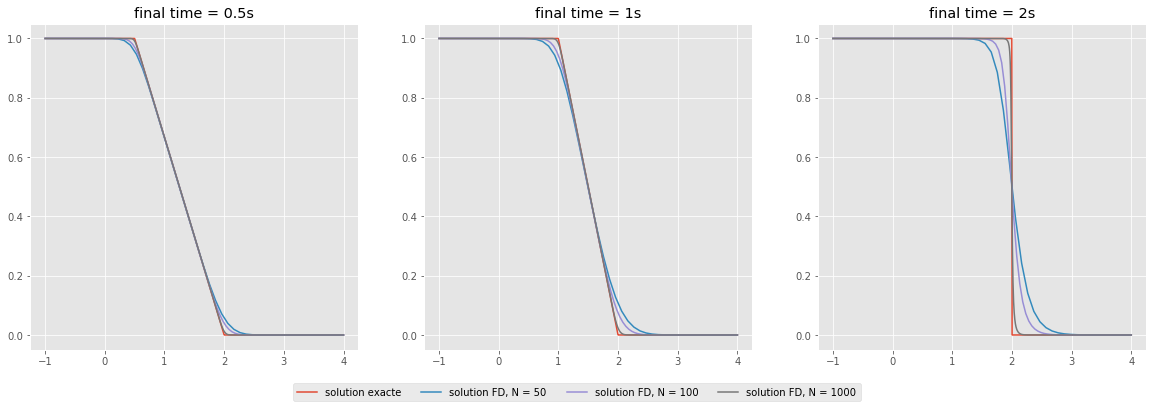

In [2]:
def flux_Burgers(u):
    ## cette fonction retourne la valeur de f pour l'équation de Burgers
    return u**2/2

def dflux_Burgers_du(u):
    ## cette fonction retourne la valeur de df/du pour l'équation de Burgers
    return u

def compute_lambda_Burgers(u):
    ## cette fonction calcule lambda pour le schéma de Rusanov appliqué à l'équation de Burgers
    return np.max(np.abs(dflux_Burgers_du(u)))

def flux_Rusanov_Burgers( u_L, u_R, Lambda ):
    ## cette fonction calcule le flux numérique pour le schéma de Rusanov appliqué à l'équation de Burgers
    return (flux_Burgers(u_L)+flux_Burgers(u_R))/2-(Lambda/2)*(u_R-u_L)

def compute_dt_Rusanov_Burgers( Lambda, dx, CFL, time, end_time ):
    ## cette fonction calcule le pas de temps pour le schéma de Rusanov appliqué à l'équation de Burgers
    dt =CFL*(dx/Lambda)
    ## on réduit le pas de temps si besoin, pour ne pas dépasser end_time
    if time + dt > end_time:
        dt = end_time - time
    return dt

def update_Rusanov_Burgers( u, dx, dt, Lambda ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma de Rusanov appliqué à l'équation de Burgers
    Lambda = compute_lambda_Burgers(u)
    n=len(u)
    u_np1=np.zeros(n)
    for i in range(n-1):
        if i==0:
            u_np1[i]=u_BC()   
        else:
            u_np1[i] = u[i] - dt / dx *(flux_Rusanov_Burgers( u[i], u[i+1], Lambda )-flux_Rusanov_Burgers( u[i-1], u[i], Lambda )) 
    u_np1[n-1]=u_np1[n-2]
    return u_np1

xmin =-1          # borne inférieure de l'intervalle
xmax =4          # borne supérieure de l'intervalle
CFL =1/2           # valeur de la condition CFL

# pas besoin de modifier cette ligne
fig, ax = plt.subplots( 1, 3, figsize = ( 20, 6 ) )

all_times = [ 1/2, 1, 2 ]         # les temps finaux qu'on veut regarder
all_N = [ 50, 100, 1000 ]       # les discrétisations en espace qu'on veut regarder

for i_t, end_time in enumerate(all_times):
    # on parcourt tous les temps finaux
    
    # pas besoin de modifier les quatre lignes ci-dessous
    ax[i_t].set_title("final time = {0}s".format(end_time))
    exact_x = np.linspace(xmin, xmax, 1000)
    exact_solution = u_exact(np.linspace(xmin, xmax, 1000), end_time)
    ax[i_t].plot( exact_x, exact_solution, label="solution exacte" )  

    for i_N, N in enumerate(all_N):
        # on parcourt toutes les discrétisations en espace

        x = np.linspace(-1,4,N)            # points de discrétisation
        dx =5/N            # pas de discrétisation

        u =u_0(x)             # condition initiale

        time =0          # temps initial

        while time < end_time:
            ## boucle en temps : on part de u = u_0, et on fait évoluer la valeur de u en utilisant update_Rusanov_Burgers
            Lambda =compute_lambda_Burgers(u)
            dt =compute_dt_Rusanov_Burgers( Lambda, dx, CFL, time, end_time ) 
            u =update_Rusanov_Burgers( u, dx, dt, Lambda )
            time+=dt

        # pas besoin de changer les lignes ci-dessous
        ax[i_t].plot( x, u, label="solution FD, N = {0}".format(N) ) 

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend( handles, labels, loc='lower center', ncol=4 );

**Réponse 1.4.**

# Résolution numérique de l'équation du trafic automobile

On considère à présent le problème suivant :
$$
    \tag{$\ast\ast$}
    \begin{cases}
        \partial_t \rho + \partial_x (f(\rho)) = 0  & \; \forall x \in ] 0, L [, \forall t \in ] 0, T [, \\
        \rho(0,t) = \rho_f                          & \; \forall t \in ] 0, T [, \\
        \rho(x,0) = \rho_0(x)                       & \; \forall x \in ] 0, L [,
    \end{cases}
$$
où $\rho \in [0, \rho_b]$ représente la densité de voitures sur une route,
$\rho_b$ étant la densité maximale de voitures supportée par la route : lorsque $\rho = \rho_b$, on a un bouchon et le trafic est à l'arrêt.
À l'inverse, si $\rho = 0$, il n'y a aucune voiture sur la route.
On se donne un $\rho_f \in [0, \rho_b]$, qui représentera la densité typique de voitures sur la route, donnant un trafic fluide.

Pour modéliser ce phénomène, la fonction $f$, représentant le flux de voitures sur la route, est donnée par :
$$
    f(\rho) = \rho v_0 \left( 1 - \frac \rho {\rho_b} \right),
$$
où $v_0$ est la vitesse maximale autorisée sur la route.

Si $\rho = \rho_b$, on a bien $f(\rho_b) = 0$ : quand la densité maximale de voitures est atteinte, le flux est nul, et donc la circulation est arrêtée.
À l'inverse, si $\rho = 0$, on a $f(0) = 0$ : quand la densité de voitures est nulle, le flux est nul puisqu'il n'y a aucune voiture sur la route.

Dans les applications numériques, on pourra prendre :
- $v_0 = 130$km/h pour une autoroute française,
- $\rho_b = 100$ (on peut voir cette valeur comme si la route était occupée à 100%, ce qui crée un bouchon),
- $\rho_f = 25$ (on peut voir cette valeur comme si la route était occupée à 25%, et le trafic est fluide),
- $L = 5$km pour regarder un tronçon d'autoroute de $5$km de long.

La condition initiale sera prise de la façon suivante :
$$
    \rho_0(x) = 
    \begin{cases}
        \rho_f                      & \text{si } x \leq 1, \\
        \rho_f + 3 \rho_f ( x - 1 ) & \text{si } 1 < x \leq 2, \\
        \rho_b                      & \text{si } 2 < x \leq 3, \\
        \rho_f                      & \text{si } x > 3.
    \end{cases}
$$
Cette condition initiale correspond à un trafic fluide ($\rho = \rho_f$) pour $x \leq 1$ et $x > 3$, un bouchon à $x = 3$km qui arrête le trafic ($\rho = \rho_b$) pour $2 < x \leq 3$, ce qui se répercute en amont en un trafic non fluide mais pas à l'arrêt ($\rho_f < \rho < \rho_b$) pour $1 < x \leq 2$.

**Question 2.** Programmer le schéma du Rusanov pour l'équation du trafic automobile (on pourra reprendre la **Question 1.3.** avec le flux $f$ donné ci-dessus). Étudier ensuite les solutions numériques. On pourra par exemple déterminer :
- l'instant $t_1$ à partir duquel le trafic n'est plus bloqué nulle part (i.e. $\forall x, \, \rho(x, t_1) < \rho_b$),
- l'instant $t_2$ à partir duquel le trafic est fluide partout (i.e. $\forall x, \, \rho(x, t_2) = \rho_f$).

Attention aux unités ! Puisque $v_0$ est donnée en km/h, $t$ est ici donné en heures.

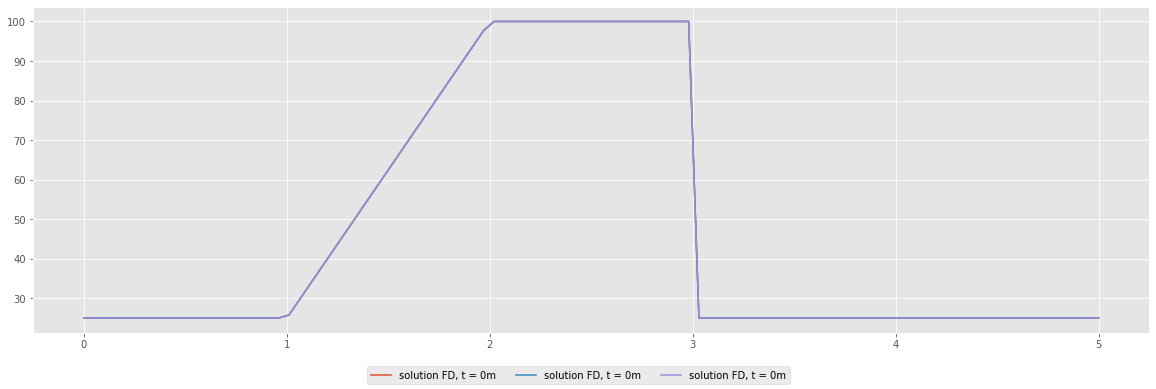

In [14]:
rho_b =100         # valeur de la densité maximale, correspondant à un bouchon
rho_f =25         # valeur de la densité correspondant à un trafic fluide
v_0 =130           # valeur de la vitesse maximale autorisée sur l'autoroute (en km/h)

def rho_initial(x):
    ## cette fonction retourne la condition initiale en fonction de x pour l'équation du trafic routier
    return rho_f*(x<=1)+(rho_f+3*rho_f*(x-1))*np.logical_and( 1 < x, x <= 2 )+rho_b*np.logical_and( 2 < x, x <= 3 )+rho_f*(x>3)

def rho_BC():
    ## cette fonction retourne la valeur de la condition aux limites à gauche pour l'équation du trafic routier
    return rho_f

def flux_traffic(rho):
    ## cette fonction retourne la valeur de f pour l'équation du trafic routier
    return rho*v_0*(1-rho/rho_b)

def dflux_traffic_drho(rho):
    ## cette fonction retourne la valeur de df/drho pour l'équation du trafic routier
    return v_0-(2*rho*v_0)/rho_b

def compute_lambda_traffic(pho):
    ## cette fonction calcule lambda pour le schéma de Rusanov appliqué à l'équation du trafic routier
    return np.max(np.abs(dflux_traffic_drho(pho))) 

def flux_Rusanov_traffic( rho_L, rho_R, Lambda ):
    ## cette fonction calcule le flux numérique pour le schéma de Rusanov appliqué à l'équation du trafic routier
    return (flux_traffic(rho_L)+flux_traffic(rho_R))/2-(Lambda/2)*(rho_R-rho_L)

def compute_dt_Rusanov_traffic( rho, dx, CFL, time, end_time ):
    ## cette fonction calcule le pas de temps pour le schéma de Rusanov appliqué à l'équation du trafic routier
    dt = CFL*dx/np.max(np.abs( dflux_traffic_drho(rho)))
    ## on réduit le pas de temps si besoin, pour ne pas dépasser end_time
    if time + dt > end_time:
        dt = end_time - time
    return dt

def update_Rusanov_traffic( rho, dx, dt ):
    ## cette fonction retourne la mise à jour en temps du vecteur u par le schéma de Rusanov appliqué à l'équation du trafic routier
    Lambda = compute_lambda_traffic(rho)
    n=len(rho)
    u_np1=np.zeros(n)
    for i in range(n-1):
        if i==0:
            u_np1[i]=rho_BC()   
        else:
            u_np1[i] = rho[i] - dt / dx *(flux_Rusanov_traffic( rho[i], rho[i+1], Lambda )-flux_Rusanov_traffic( rho[i-1], rho[i], Lambda )) 
    u_np1[n-1]=u_np1[n-2]
    return u_np1

xmin =0          # borne inférieure de l'autoroute (en km)
xmax =5          # borne supérieure de l'autoroute (en km)
CFL =1/2           # valeur de la condition CFL

# pas besoin de modifier cette ligne
fig, ax = plt.subplots( figsize = ( 20, 6 ) )

end_time_minutes = [0, 0, 0]                                 # temps finaux en minutes : on pourra par exemple commencer par tester end_time_minutes = [0, 2, 4]
end_time_hours = np.array(end_time_minutes) / 60    # conversion des temps finaux de minutes en heures

for i_t, end_time in enumerate(end_time_hours):
    # on parcourt tous les temps finaux

    N =100           # nombre de points en espace

    x =np.linspace(0,5,N)           # points de discrétisation
    dx =5/N          # pas de discrétisation

    rho =rho_initial(x)         # condition initiale

    time =0        # temps initial

    while time < end_time:
        ## boucle en temps : on part de rho = rho_initial, et on fait évoluer la valeur de rho en utilisant update_Rusanov_traffic
        Lambda =compute_lambda_traffic(rho)
        dt =compute_dt_Rusanov_traffic( rho, dx, CFL, time, end_time )
        rho =update_Rusanov_traffic( rho, dx, dt ) 
        time+=dt
    # pas besoin de changer les lignes ci-dessous
    ax.plot( x, rho, label="solution FD, t = {0}m".format(time*60) ) 

handles, labels = ax.get_legend_handles_labels()
fig.legend( handles, labels, loc='lower center', ncol=3 );

**Réponse 2** On cherche l'instant $t_1$ à partir duquel le trafic n'est plus bloqué nulle part (i.e. $\forall x, \, \rho(x, t_1) < \rho_b$). Ici $\rho_b$ = 100, ainsi on cherche un $t_1$ dans le code tel que la courbe affiché n'atteint pas 100 sur l'axe des ordonnés. On remarque que si $t_1$ est inférieur à ou égale à 0.6 en minute on constate que la courbe atteint un maximum inférieur à 100. Ainsi si à partir de $t_1$ = 36 seconde, le trafic n'est plus bloqué nulle part.

On cherche l'instant $t_2$ à partir duquel le trafic est fluide partout (i.e. $\forall x, \, \rho(x, t_2) = \rho_f$). Ici $\rho_f$ = 25, ainsi on cherche $t_2$ dans le code tel que la courbe affiché est une droite d'équation $\rho(x, t) = 25$. On remarque que si $t_2$ est inférieur ou égale à 11.45 en minute alors la courbe est bien celle d'un droite d'équation constante vallant 25. Ainsi à partir de $t_2$ = 11 minutes et 27 secondes, le trafic est fluide partout.

Maintenant nous allons décrire plusieur courbe en fonction de $t$ exprimées en minutes:

Si $t=0$:
On sait que la densité est alors représenté par la condition initiale $\rho_0(x)$. 
Cette condition initiale correspond à un trafic fluide pour $x \leq 1$,en effet le bouchon va commencer à se fluidifier, ensuite le trafic est non fluide mais pas à l'arrêt pour $1 < x \leq 2$ car la où la densité est maximale on aura un trafic un peu plus fluide car le feu est passé au vert mais on a un trafic qui se densifie, qui devient moins fluide parce que les voitures arrivent sur la zone de trafic lent, ensuite le trafic est à l'arret, il y a un bouchon en $x = 3$km, puis après on repart sur un trafic fluide.
Ainsi on pourrait se dire qu'a un plus grand $t$ on devrait avoir que le trafic est à l'arret pour un $x$ plus petit.






Ici, on a une densité de 25, on se dit qu’une densité de 25% correspond à un trafic fluide,
Une densité de 100 % qui correspond à un bouchon, dans le modèle simple cela correspond à des voitures qui sont à « touche touche », à l’arrêt, parechoc sur parechoc.
Cette partie là correspond à une densité qui augmente graduellement, donc sur 1 km entre 1 et 2, on a une densité qui augmente graduellement donc les voitures qui vont être de plus en plus proches sur la route à x plus grand que 3 on a un trafic fluide et à x égal à 3 on peut s’imaginer qu’on à un feu rouge qui a dans le passé ralentit le trafic et qui a créé un bouchon. 
Il faut voir ça comme une représentation continue d’un phénomène qui est discontinue discret qui est le nombre de voitures sur une route et on le regarde sous la forme d’une densité quantité de voitures par m2.

A l’instant t=0 le feu passe au vert et reste vert pendant tout le temps plus grand à. 
Que va-t-il se passer ?
Instinctivement, le bouchon va commencer à se fluidifier, la où la densité est maximale on aura un trafic un peu plus fluide car le feu est passé au vert mais on a un trafic qui se densifie, qui devient moins fluide parce que les voitures arrivent sur la zone de trafic lent.  Ainsi à priori, si on avance un petit peu le temps, on devrait avoir que le bouchon se décale vers la gauche. (effet domino)

Si on prend t=0.1, ce que j’vais prédit se passe plutôt. ( Courbe violette)
On voit qu’au niveau du bouchon, le bouchon commence à se résorber à droite du feu rouge. Les voitures qui étaient à droite du feu rouge, donc à l’arrêt, commencent à avancer, donc la densité de voiture diminue. De même la densité de voiture augmente un petit peu à droite du bouchon, forcément parce que les voitures qui étaient coincées derrière le feu rouge qui commencent à se mettre dans le creux de voitures qui n’étaient pas coincées. Le bouchon a reculé un petit peu car les voitures qui étaient entrain d’arriver sur le bouchon, ont continuées à s’empiler et à se densifier.

Si on prend t=0.3 ;
Le bouchon commence vraiment à se résorber, on a une zone de densité variable, la densité va progressivement.
Le bouchon est devenu un peu plus petit et s’est décalé vers la gauche. Il y a toujours des voitures qui continuent à arriver dans une zone de forte densité.
Ça commence à se raidir de plus en plus, cela veut dire que la densité de voiture va être quasiment discontinue à cet endroit-là et ça veut dire qu’entre 1.1 et 1.3, sur 200 m qui sont à 130 km/h et qui vont piller pour arriver à 0, va être fluide puis se de-fluidifier très rapidement à cet endroit-là. 
Si on continue à avancer le temps, on voit qu’au bout d’un moment le bouchon va totalement se résorber et puisqu’on n’a pas de nouveau feu qui va se créer, le flux de voiture sera constant égale à 25%.
